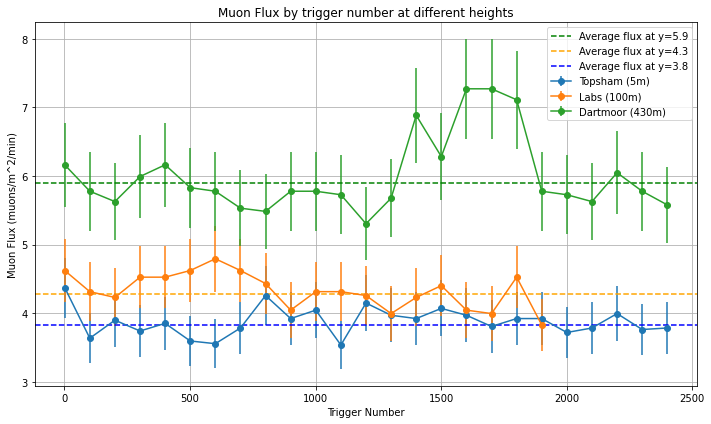

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Topsham data
triggers_topsham = np.arange(1, 2501, 100)
muon_flux_topsham = np.array([4.372367195, 3.635451376, 3.89825509, 3.740522225, 3.851847291,
                              3.595057472, 3.555551346, 3.784271023, 4.257304901, 3.921880878,
                              4.044439656, 3.536122103, 4.148143237, 3.970002116, 3.921880878,
                              4.069876383, 3.970002116, 3.806531441, 3.921880878, 3.921880878,
                              3.719024971, 3.784271023, 3.994508302, 3.762269447, 3.784271023])

# Labs data
triggers_labs = np.arange(1, 2001, 100)
muon_flux_labs = np.array([4.622217, 4.314069, 4.229479, 4.525247, 4.525247, 4.622217,
                           4.79341, 4.622217, 4.432263, 4.04444, 4.314069, 4.314069, 4.257305,
                           3.994508, 4.229479, 4.402111, 4.04444, 3.994508, 4.525247, 3.829055])

# Dartmoor data
triggers_dartmoor = np.arange(1, 2501, 100)
muon_flux_dartmoor = np.array([6.162955666, 5.777770937, 5.627046478, 5.991762453, 6.162955666,
                               5.829822927, 5.777770937, 5.530857649, 5.483985974, 5.777770937,
                               5.777770937, 5.726640221, 5.304183155, 5.676406534, 6.884152606,
                               6.282624708, 7.270902752, 7.270902752, 7.111102692, 5.777770937,
                               5.726640221, 5.627046478, 6.047760233, 5.777770937, 5.578537456])

# Uncertainty in muon flux for all datasets
error_percentage = 10
error_values_topsham = muon_flux_topsham * (error_percentage / 100)
error_values_labs = muon_flux_labs * (error_percentage / 100)
error_values_dartmoor = muon_flux_dartmoor * (error_percentage / 100)

# Plotting
plt.figure(figsize=(10, 6))

# Plot Topsham
plt.errorbar(triggers_topsham, muon_flux_topsham, yerr=error_values_topsham, fmt='o-', label='Topsham (5m)')

# Plot Labs
plt.errorbar(triggers_labs, muon_flux_labs, yerr=error_values_labs, fmt='o-', label='Labs (100m)')

# Plot Dartmoor
plt.errorbar(triggers_dartmoor, muon_flux_dartmoor, yerr=error_values_dartmoor, fmt='o-', label='Dartmoor (430m)')

# Add horizontal dotted lines
plt.axhline(y=5.89998491, color='g', linestyle='--', label='Average flux at y=5.9')
plt.axhline(y=4.272765566, color='orange', linestyle='--', label='Average flux at y=4.3')
plt.axhline(y=3.827243583, color='b', linestyle='--', label='Average flux at y=3.8')

# Formatting
plt.xlabel('Trigger Number')
plt.ylabel('Muon Flux (muons/m^2/min)')
plt.title('Muon Flux by trigger number at different heights')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

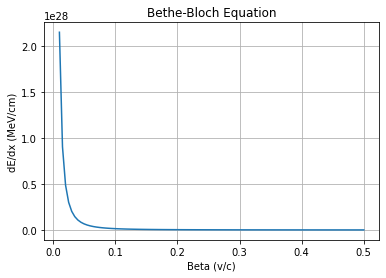

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

def bethe_bloch_equation(beta, gamma, z, ne, I):
    # Constants
    K = 0.307075  # Constant value for MeV*cm^2/mol
    
    # Calculate the equation
    result = K * ne / (beta ** 2) * (0.5 * math.log((2 * 0.511e6 * beta ** 2 * gamma ** 2) / I)
                                     - beta ** 2 - 0.5 * delta_function(beta * gamma))
    
    return result

def delta_function(beta_gamma):
    # # Density correction term
    return 4 * np.log(10) * np.log(beta_gamma) - np.log(beta_gamma*2 / (1 + beta_gamma*2))

# Generate beta values
beta_values = np.linspace(0.01, 0.5, 100)
gamma_values = 1 / np.sqrt(1 - beta_values**2)

# Set other parameters
z_value = -1  # Replace with the charge of the incident particle
ne_value = 3.37e23  # Replace with your desired electron density in cm^-3
I_value = 4.7808  # Replace with the mean excitation energy of the material in eV

# Calculate Bethe-Bloch values for each beta
bethe_values = [bethe_bloch_equation(beta, gamma, z_value, ne_value, I_value) for beta, gamma in zip(beta_values, gamma_values)]

# Plot the result
plt.plot(beta_values, bethe_values)
plt.xlabel('Beta (v/c)')
plt.ylabel('dE/dx (MeV/cm)')
plt.title('Bethe-Bloch Equation')
plt.grid(True)
plt.show()